How to Solve any NLP Problem:
1. Find a Textual Dataset
2. Then prepare the Dataset by Tokenization, Stopwords removal, and Stemming
3. Then Perform Text Vectorization
4. Finally Text classification or Clustering


Step 1: Importing the necessary Libraries

In [49]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
import nltk
import re
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.linear_model import PassiveAggressiveClassifier

Step 2: Collecting and analysing the Dataset

In [50]:
data = pd.read_csv(r"C:\Users\Accounts01\Desktop\Data set for projects\IMDB Dataset.csv")

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [52]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [53]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


Step 3: Data Preparation, Tokenization, Stopwords Removal and Stemming

In [54]:
stemmer = nltk.SnowballStemmer("english")

In [55]:
stopword = set(stopwords.words('english'))

In [56]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w\*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text
    

In [57]:
data["review"] = data["review"].apply(clean)

In [58]:
text = " ".join(i for i in data.review)

In [59]:
stopwords = set(STOPWORDS)

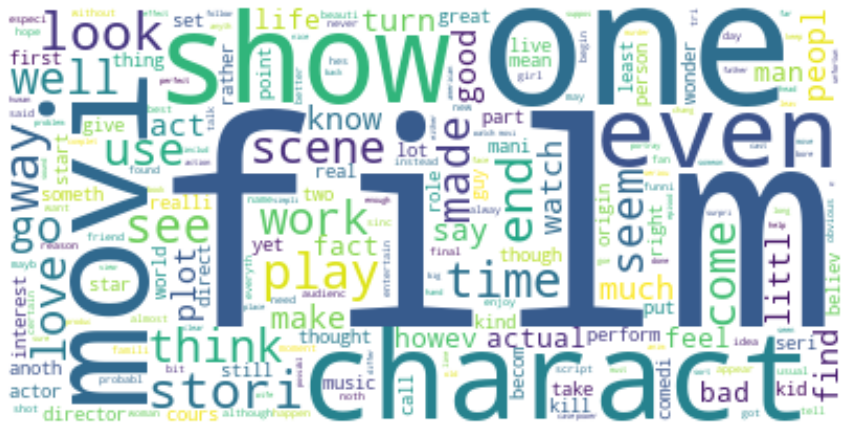

In [60]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Step 4: Text Vectorization

In [61]:
x = np.array(data["review"])
print(x)

['one review mention watch 1 oz episod youll hook right exact happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus main emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comf

In [62]:
y = np.array(data["sentiment"])
print(y)

['positive' 'positive' 'positive' ... 'negative' 'negative' 'negative']


In [63]:
cv = CountVectorizer()

In [64]:
x = cv.fit_transform(x)
print(x)

  (0, 114586)	1
  (0, 133164)	1
  (0, 101001)	1
  (0, 173297)	3
  (0, 117687)	5
  (0, 52702)	2
  (0, 180279)	1
  (0, 76664)	1
  (0, 133781)	2
  (0, 54304)	1
  (0, 71762)	1
  (0, 101496)	1
  (0, 60092)	2
  (0, 159696)	1
  (0, 152762)	2
  (0, 24587)	1
  (0, 167759)	1
  (0, 138160)	1
  (0, 171466)	4
  (0, 141900)	1
  (0, 177733)	1
  (0, 67155)	1
  (0, 165170)	1
  (0, 143883)	4
  (0, 56289)	1
  :	:
  (49999, 56678)	2
  (49999, 77666)	1
  (49999, 165059)	1
  (49999, 29332)	1
  (49999, 137627)	1
  (49999, 88648)	1
  (49999, 167817)	1
  (49999, 91503)	1
  (49999, 81781)	1
  (49999, 14844)	1
  (49999, 132145)	1
  (49999, 79810)	1
  (49999, 13075)	1
  (49999, 164441)	1
  (49999, 88187)	1
  (49999, 149487)	1
  (49999, 99620)	1
  (49999, 38439)	1
  (49999, 26089)	1
  (49999, 110298)	1
  (49999, 106889)	1
  (49999, 29491)	1
  (49999, 68052)	1
  (49999, 132153)	1
  (49999, 180156)	1


In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

Step 5: Text Classifications

In [82]:
model = PassiveAggressiveClassifier()

In [83]:
model.fit(x_train, y_train)

PassiveAggressiveClassifier()

In [88]:
user = input("Enter a text about the movie: ")

Enter a text about the movie: one of the worst movies I have ever seen!


In [89]:
data = cv.transform([user]).toarray()

In [90]:
output = model.predict(data)

In [91]:
print(output)

['negative']
